Импортируем модули.

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats

# отбор признаков
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # для классификации
from sklearn.feature_selection import f_regression # для регрессии
from sklearn.feature_selection import mutual_info_regression # для регрессии

Импортируем датасеты (X_bp.xlsx, X_nup.xlsx) и объединяем используя INNER.

In [2]:
x_bp_df = pd.read_excel('../data/X_bp.xlsx', sheet_name='X_bp.csv')
x_nup_df = pd.read_excel('../data/X_nup.xlsx', sheet_name='X_nup.csv')
bp_nup_df = x_bp_df.merge(x_nup_df, left_index=True, right_index=True, how='inner')

Удаляем лишние колонки - индексы датасетов

In [3]:
bp_nup_df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'],axis = 1, inplace=True)

In [ ]:
bp_nup_df.to_csv('../data/initdata.csv')

### Получаем информацию по датасетам:

Смотрим данные в исходных датасетах.

In [4]:
bp_nup_df.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   
1                         50.0                        23.750000   
2                         49.9                        33.000000   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               57.0  
1                    220.0                 0.0          4.0               60.0  
2                    220.0                 0.0          4.0               70.0

In [5]:
bp_nup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

По результату видим, что по параметрам датасета нет нулевых данных (Non-Null Count), поэтому проверку:
1. на isnull().sum() не проводим.

### Проводим одномерный анализ датасетов, функцией describe().

In [6]:
bp_nup_df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [7]:
bp_nup_df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

bp_nup_df.drop([19], axis = 0, inplace=True)

bp_nup_df.reset_index(inplace=True)

In [8]:
bp_nup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [9]:
bp_nup_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022],
           dtype='int64', length=1023)

In [10]:
bp_nup_df2 = bp_nup_df[(bp_nup_df['Шаг нашивки'] > 1) & (bp_nup_df['Плотность нашивки'] > 24)].copy().reset_index(drop=True)

In [11]:
bp_nup_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1005 non-null   float64
 1   Плотность, кг/м3                      1005 non-null   float64
 2   модуль упругости, ГПа                 1005 non-null   float64
 3   Количество отвердителя, м.%           1005 non-null   float64
 4   Содержание эпоксидных групп,%_2       1005 non-null   float64
 5   Температура вспышки, С_2              1005 non-null   float64
 6   Поверхностная плотность, г/м2         1005 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1005 non-null   float64
 8   Прочность при растяжении, МПа         1005 non-null   float64
 9   Потребление смолы, г/м2               1005 non-null   float64
 10  Угол нашивки, град                    1005 non-null   float64
 11  Шаг нашивки      

In [94]:
bp_nup_df3 = bp_nup_df[bp_nup_df.index <= 22]

In [95]:
bp_nup_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       23 non-null     float64
 1   Плотность, кг/м3                      23 non-null     float64
 2   модуль упругости, ГПа                 23 non-null     float64
 3   Количество отвердителя, м.%           23 non-null     float64
 4   Содержание эпоксидных групп,%_2       23 non-null     float64
 5   Температура вспышки, С_2              23 non-null     float64
 6   Поверхностная плотность, г/м2         23 non-null     float64
 7   Модуль упругости при растяжении, ГПа  23 non-null     float64
 8   Прочность при растяжении, МПа         23 non-null     float64
 9   Потребление смолы, г/м2               23 non-null     float64
 10  Угол нашивки, град                    23 non-null     float64
 11  Шаг нашивки          

### Проводим одномерный анализ объединенного датасета, графическим способом.

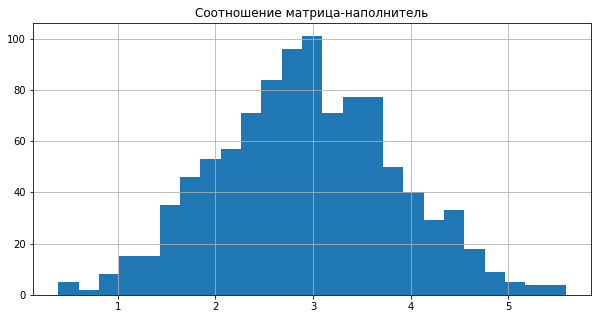

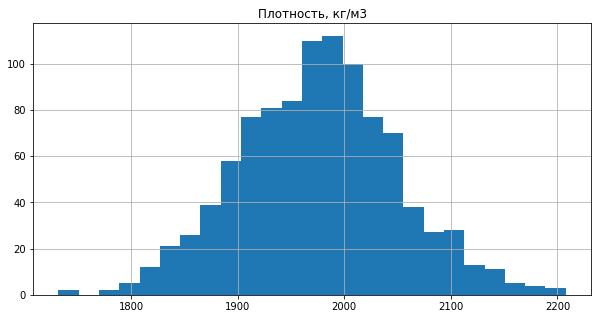

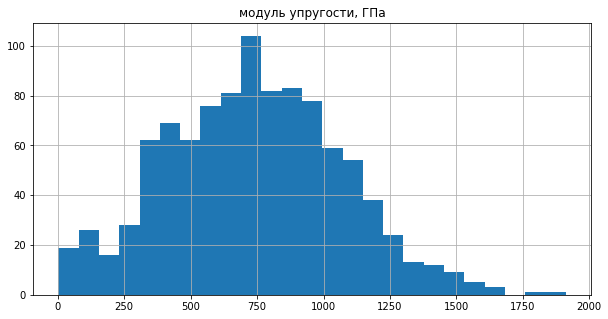

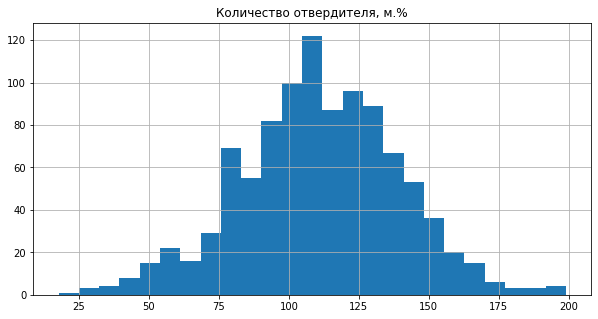

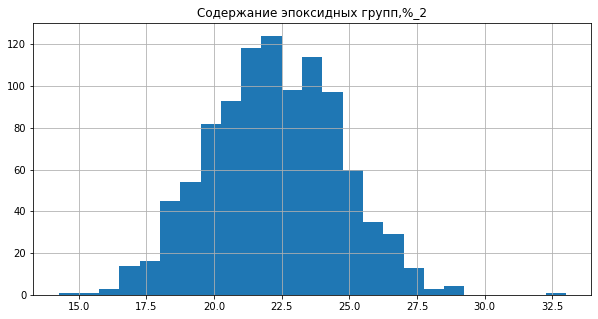

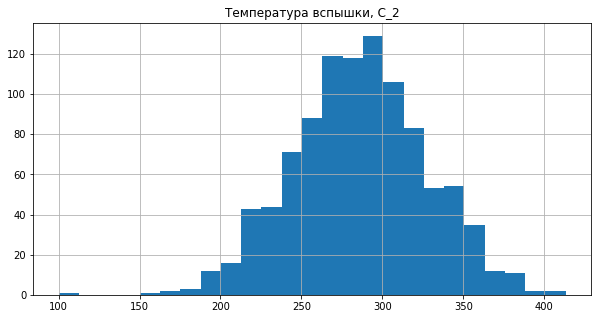

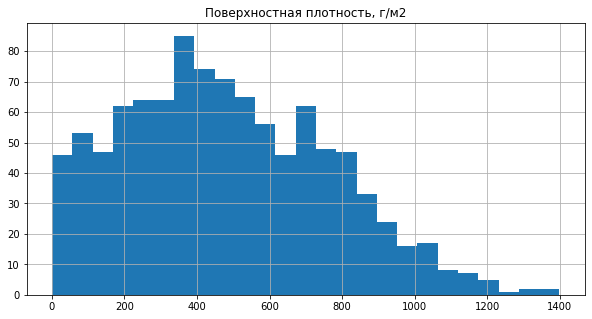

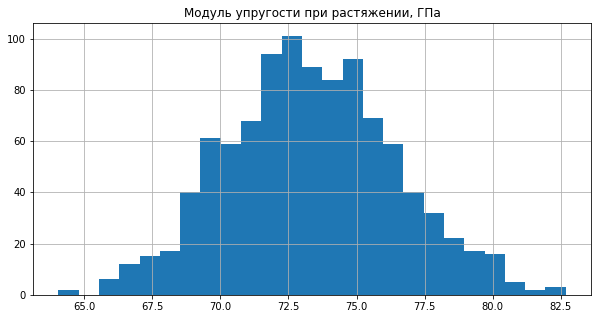

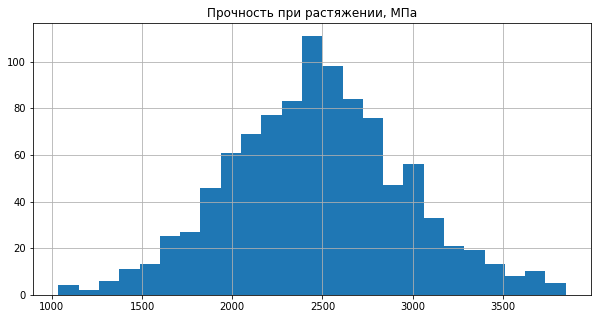

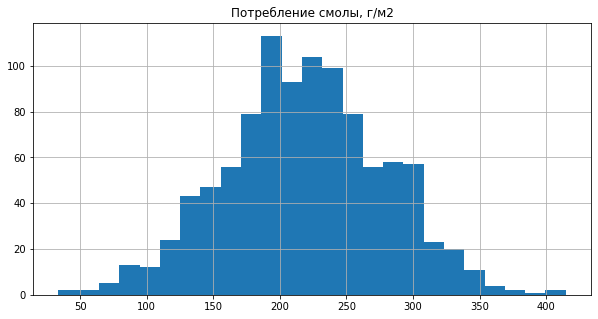

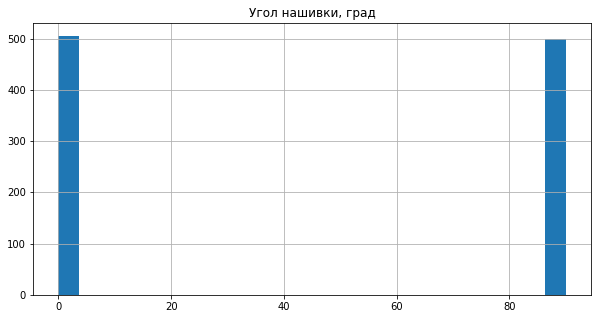

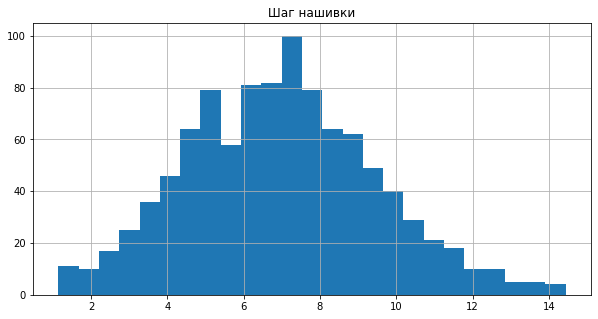

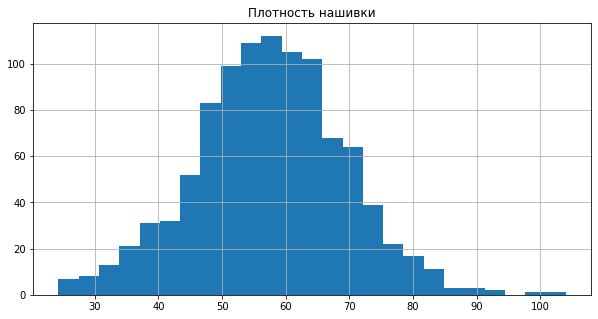

In [12]:
# Выводим распределение по всем столбцам
for column in bp_nup_df2:
    plt.figure(column, figsize = (10, 5))
    plt.title(column)
    bp_nup_df2[column].hist(bins=25)
    plt.show()

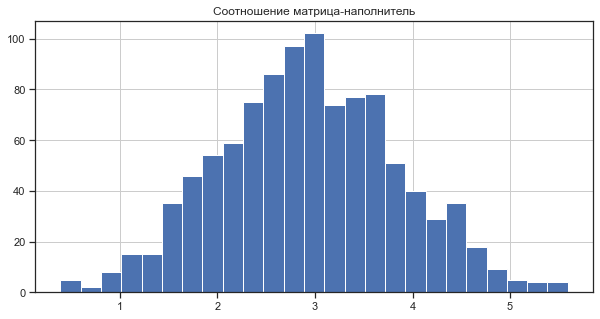

In [44]:
plt.figure('Соотношение матрица-наполнитель', figsize = (10, 5))
plt.title('Соотношение матрица-наполнитель')
bp_nup_df['Соотношение матрица-наполнитель'].hist(bins=25)
plt.show()

In [51]:
shapiro_test = stats.shapiro(bp_nup_df['Поверхностная плотность, г/м2'])
shapiro_test

ShapiroResult(statistic=0.9775959849357605, pvalue=1.848812249127807e-11)

In [88]:
data_cols = {
    'uprug': ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа',
              'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
              'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Потребление смолы, г/м2',
              'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
    'proch': ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа',
              'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
              'Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
              'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
    'matrx': ['Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%',
              'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
              'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
              'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
}

target_cols = {
    'uprug': ['Модуль упругости при растяжении, ГПа'],
    'proch': ['Прочность при растяжении, МПа'],
    'matrx': ['Соотношение матрица-наполнитель']
}

In [90]:
X = bp_nup_df[data_cols['uprug']]
y = bp_nup_df[target_cols['uprug']]
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

d:\prj\mgtu_ds_u4\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 30.        ,  22.26785714, 220.        ],
       [ 50.        ,  23.75      , 220.        ],
       [ 49.9       ,  33.        , 220.        ],
       ...,
       [110.53347744,  23.95750159, 236.60676408],
       [141.39796283,  19.24694474, 197.12606665],
       [129.1834163 ,  27.47476302, 194.75434232]])

In [ ]:
plt.figure('Поверхностная плотность, г/м2', figsize = (10, 5))
plt.title('Поверхностная плотность, г/м2')
bp_nup_df['Поверхностная плотность, г/м2'].apply(np.log).hist(bins=25)
plt.show()

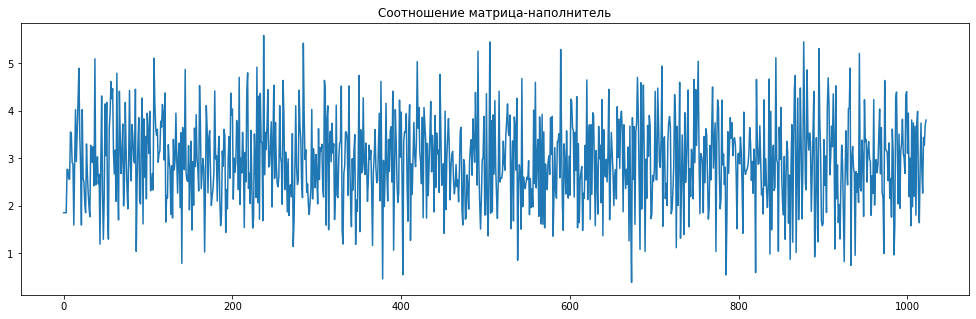

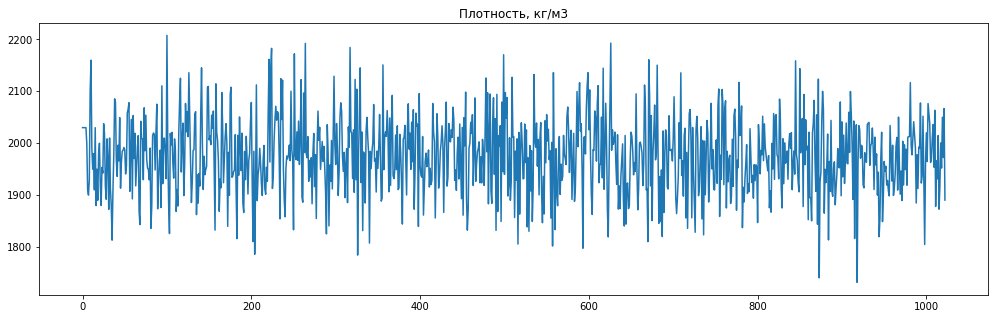

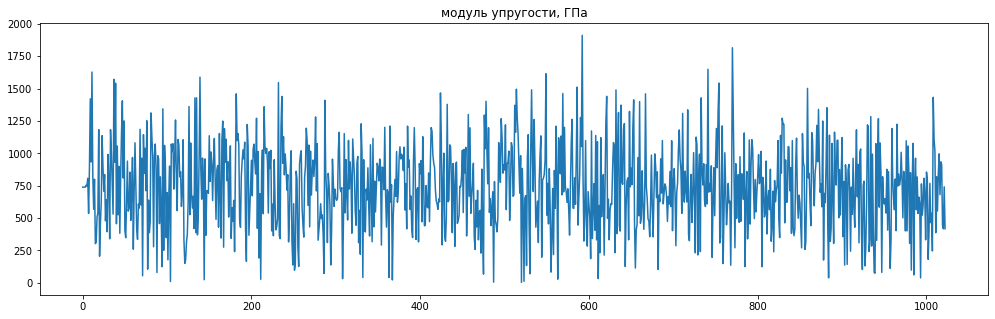

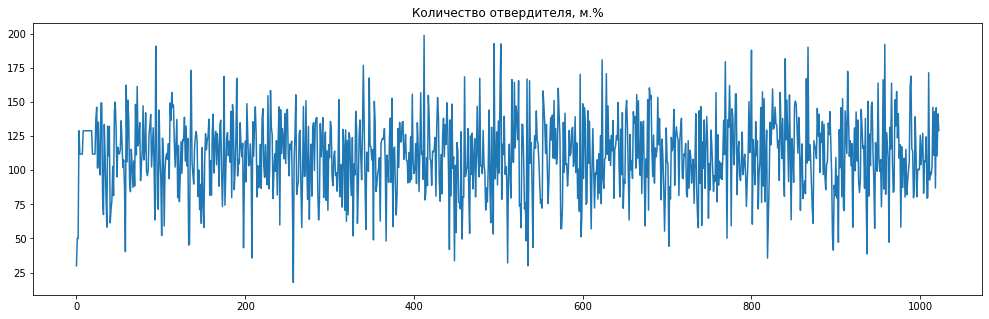

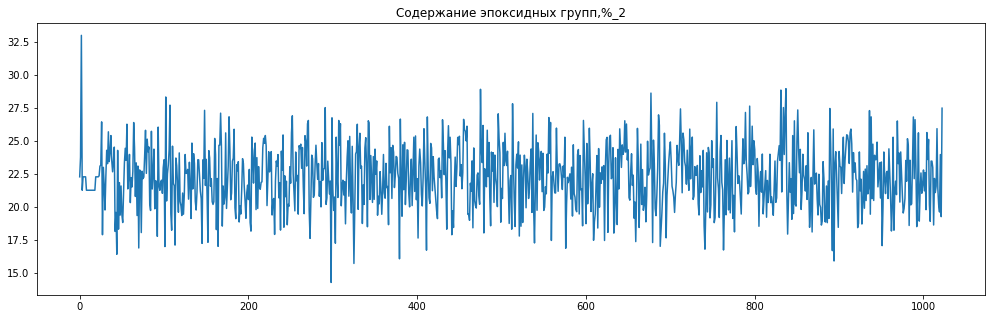

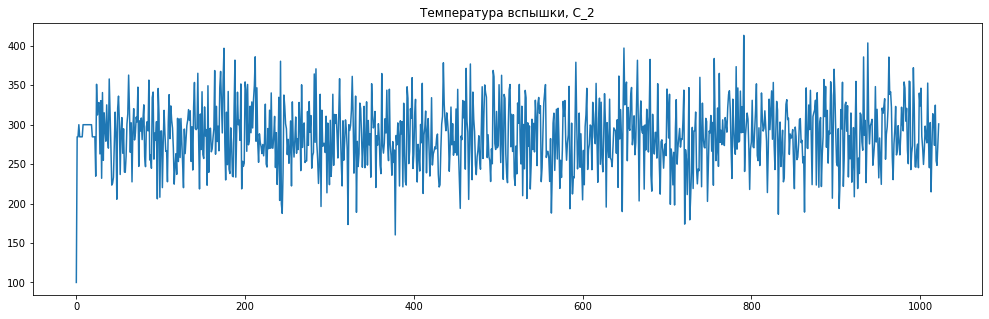

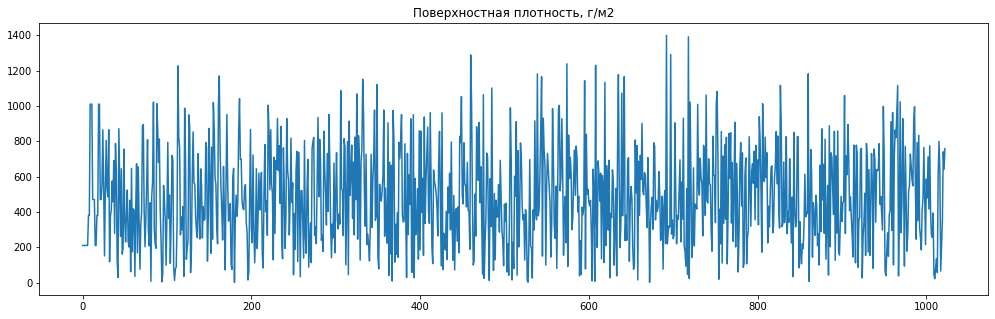

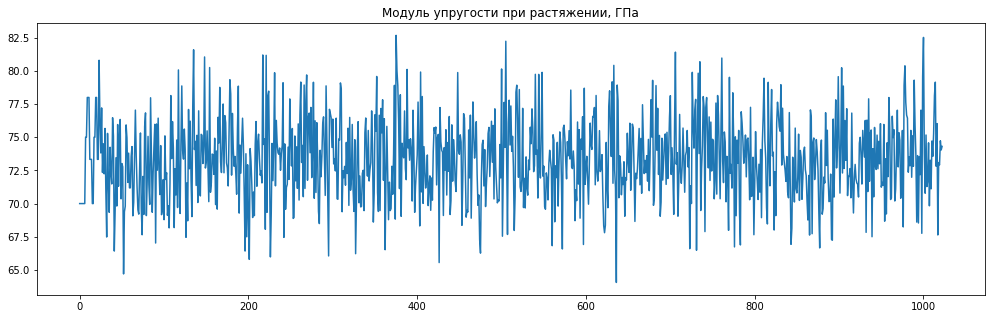

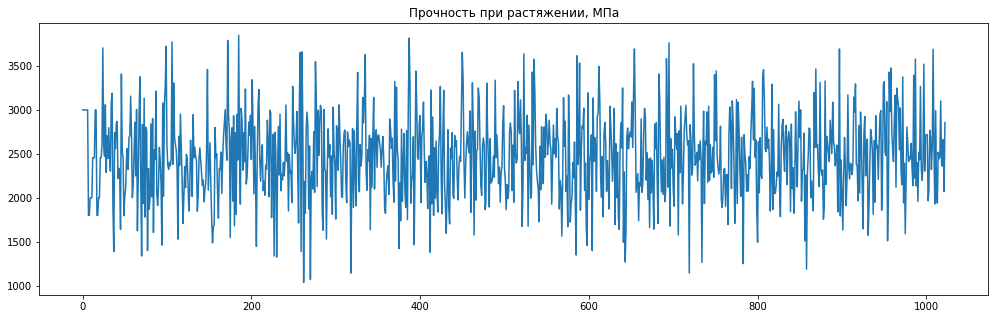

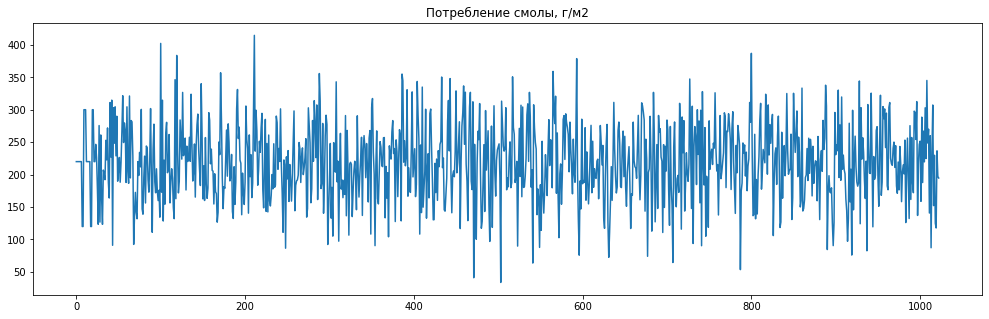

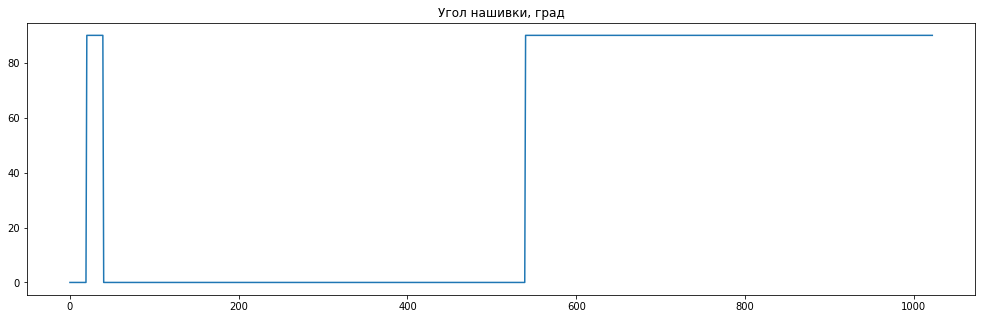

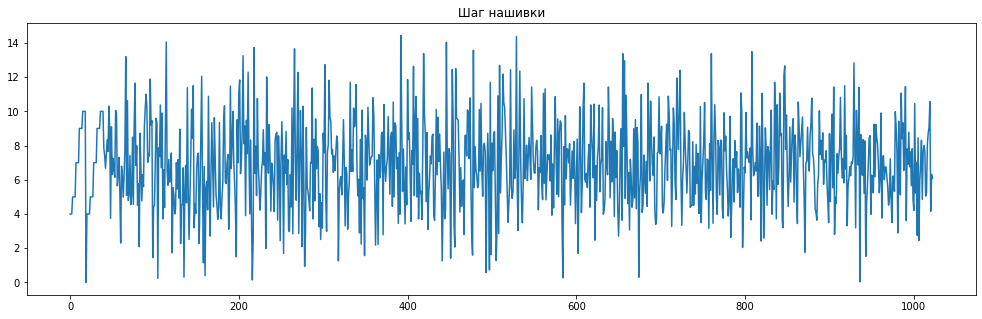

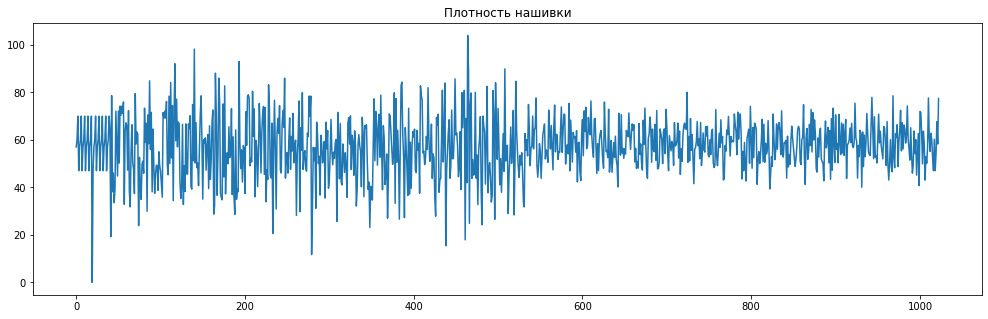

In [14]:
# Выводим тренд по всем столбцам
for column in bp_nup_df:
    plt.figure(column, figsize = (17, 5))
    plt.title(column)
    bp_nup_df[column].plot.line()

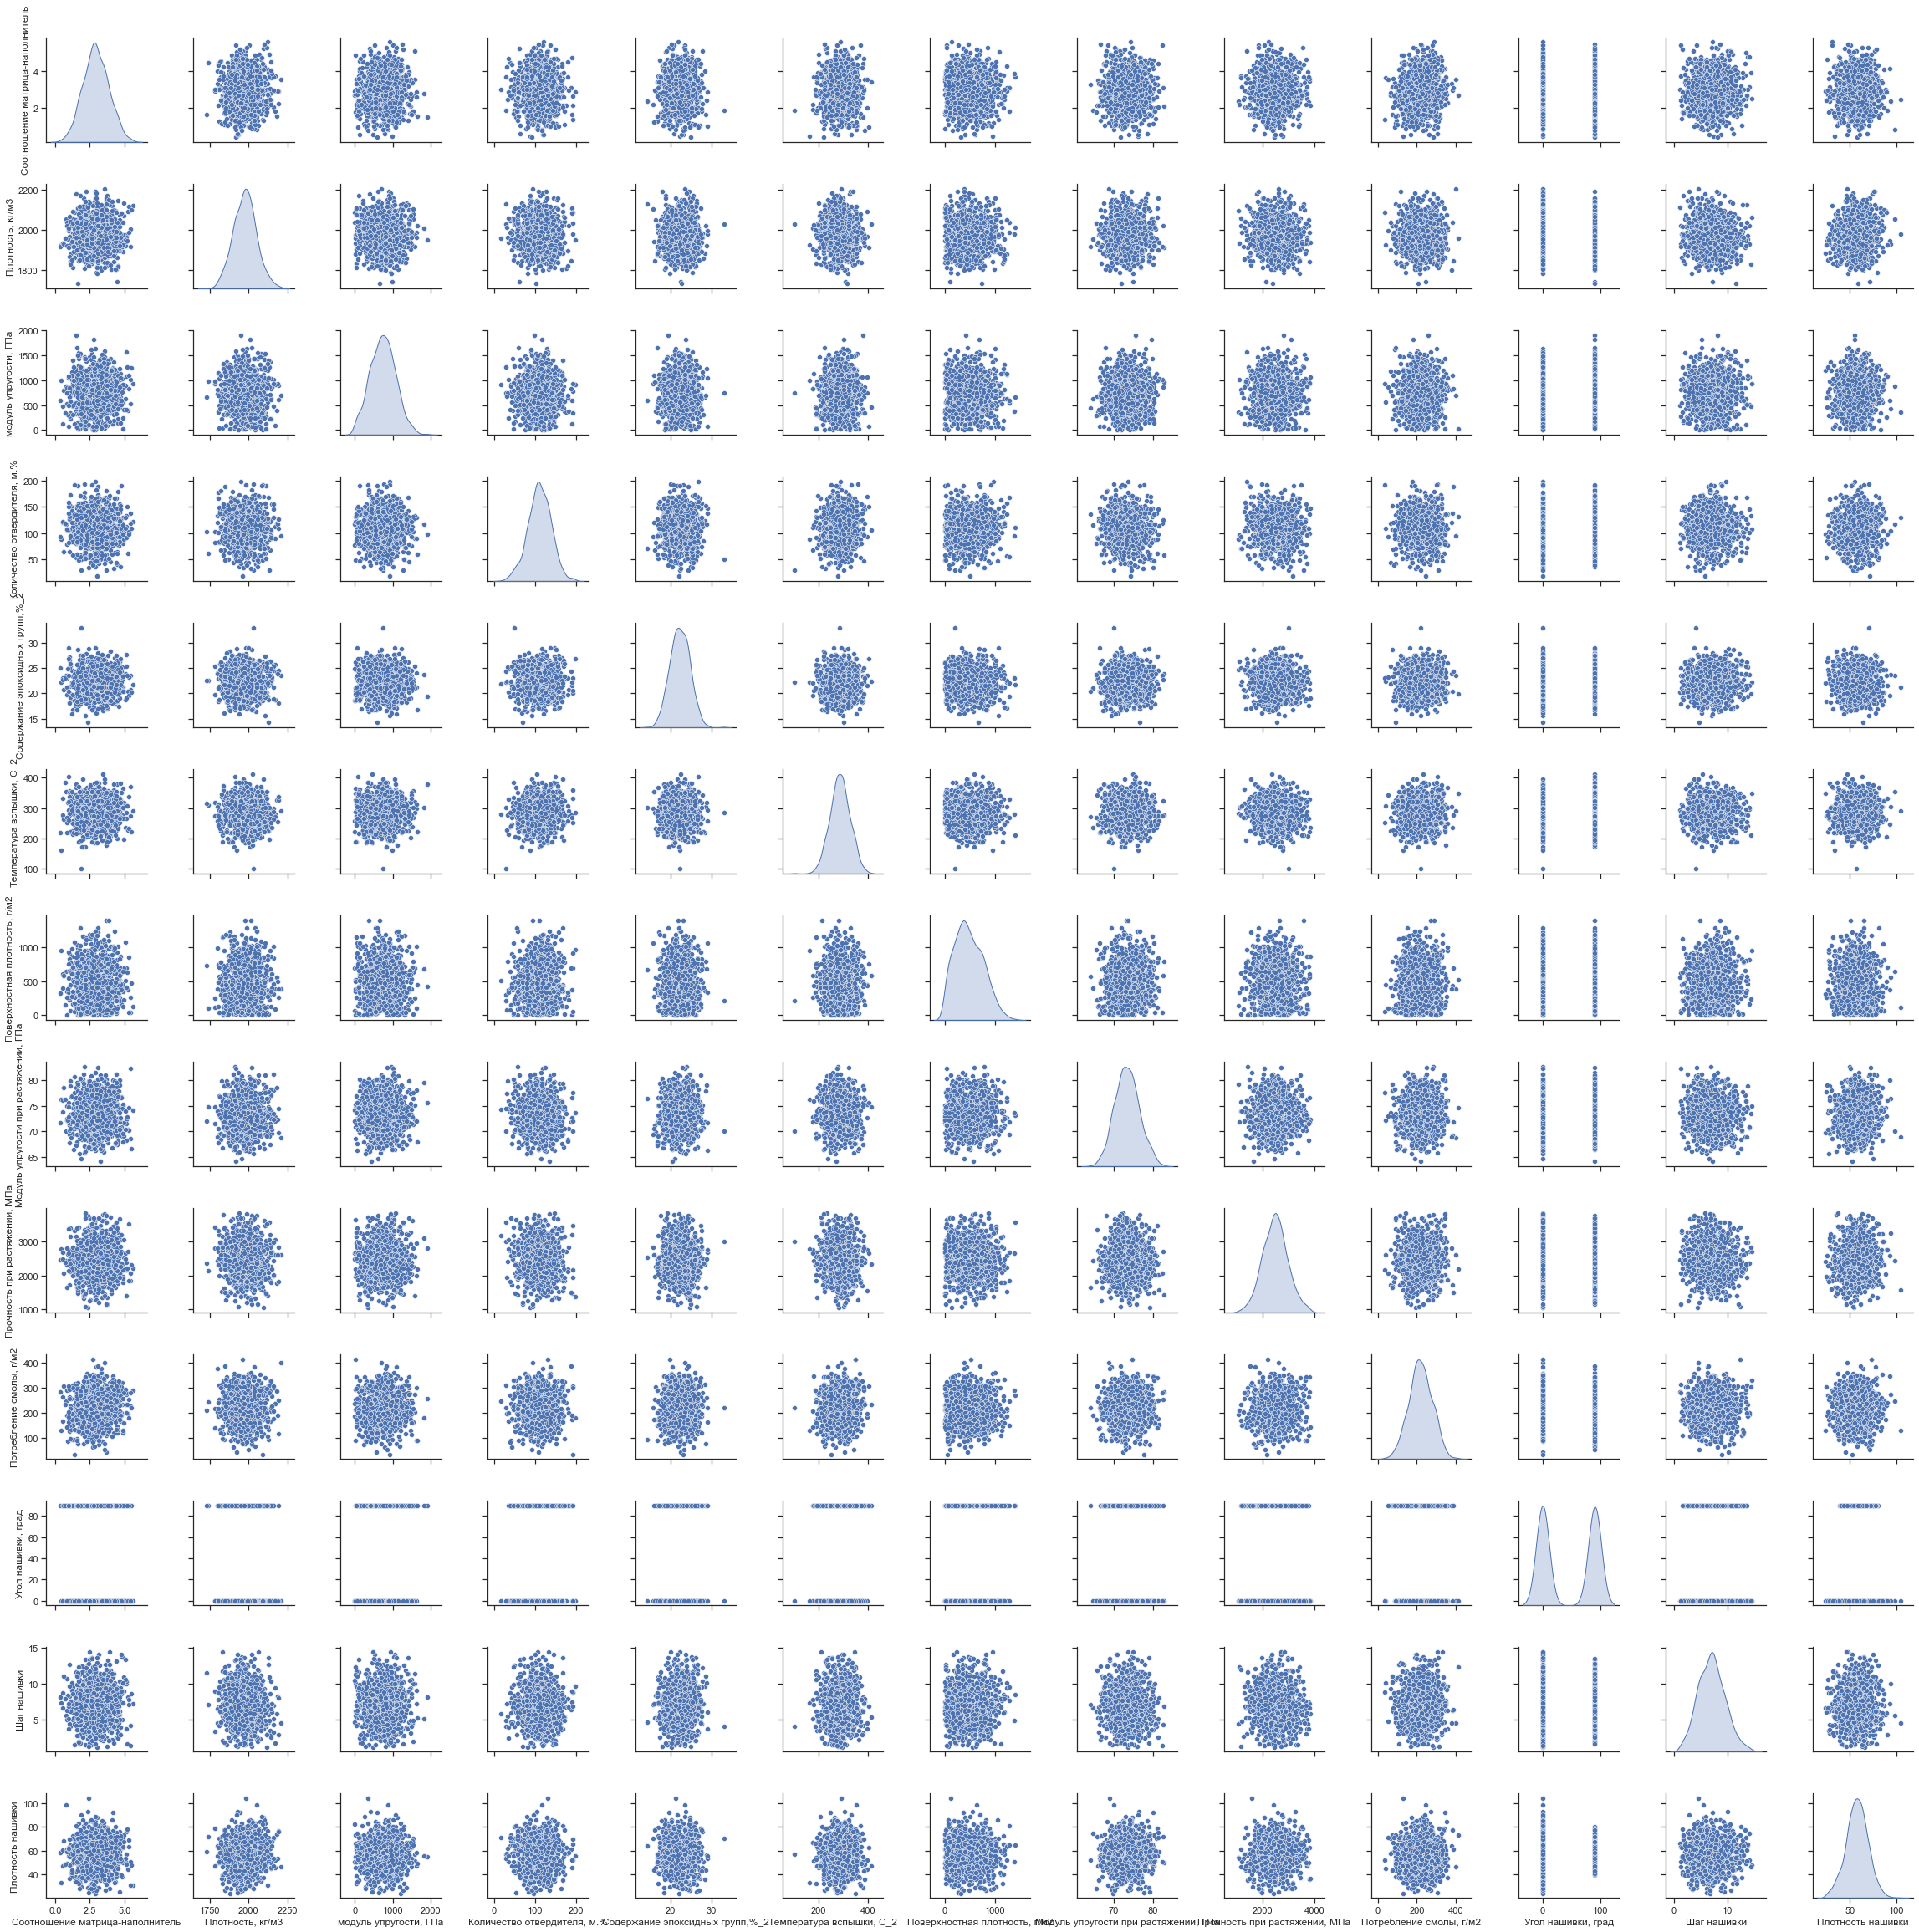

In [15]:
# Выводим матрицу рассеивания
sns.set_theme(style="ticks")
sns.pairplot(bp_nup_df2, diag_kind='kde', height=2.5) #hue = 'index' plot_kws={'alpha': 0.2}

<AxesSubplot:>

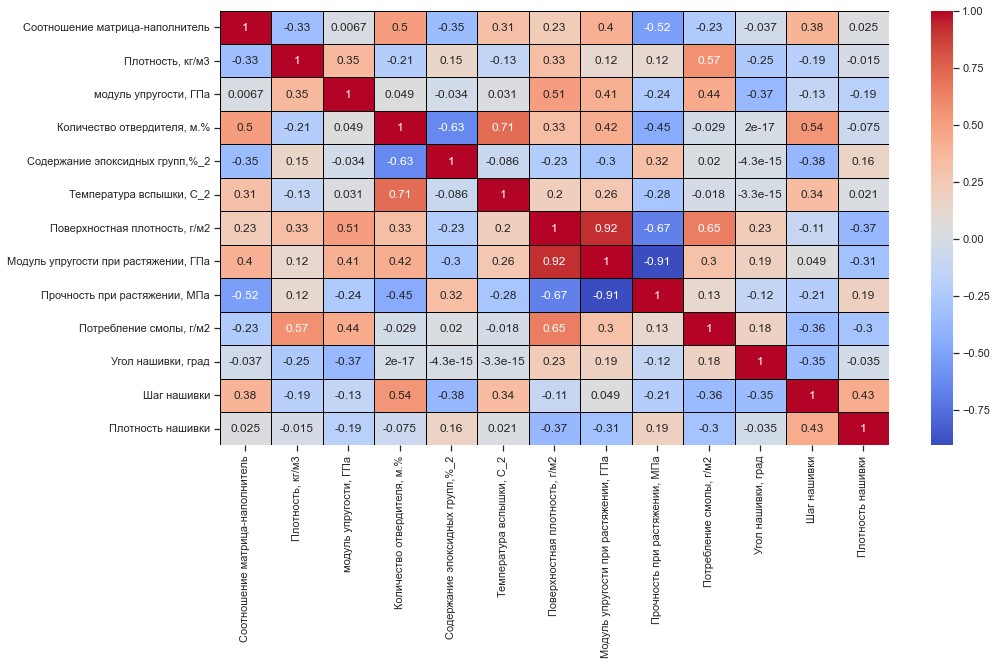

In [96]:
# Вывод матрицы корреляции
plt.figure(figsize = (15, 8))
sns.heatmap(bp_nup_df3.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

In [17]:
df_std_scaler = preprocessing.StandardScaler().fit_transform(bp_nup_df2)

In [18]:
df_std_scaler = pd.DataFrame(df_std_scaler, columns = list(bp_nup_df2.columns))

In [19]:
df_std_scaler.head(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -1.172912          0.736681               0.001546   
1                        -1.172912          0.736681               0.001546   
2                        -1.172912          0.736681               0.001546   
3                        -1.172912          0.736681               0.001546   
4                        -0.174470          0.736681               0.044862   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                    -2.855743                         0.015326   
1                    -2.149162                         0.630139   
2                    -2.152695                         4.467169   
3                     0.641834                        -0.406896   
4                     0.036294                         0.015326   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 -4.530612                      -0.968961   
1                 -0.034323                      -0.968961   
2                 -0.034323                      -0.968961   
3                  0.340368                      -0.968961   
4                 -0.034323                      -0.968961   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -1.074678                       1.088828   
1                             -1.074678                       1.088828   
2                             -1.074678                       1.088828   
3                             -1.074678                       1.088828   
4                             -1.074678                       1.088828   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.023252           -0.995037    -1.195641          -0.033725  
1                 0.023252           -0.995037    -1.195641           0.220774  
2                 0.023252           -0.995037    -1.195641           1.069103  
3                 0.023252           -0.995037    -0.792668          -0.882054  
4                 0.023252           -0.995037    -0.792668          -0.033725

<AxesSubplot:>

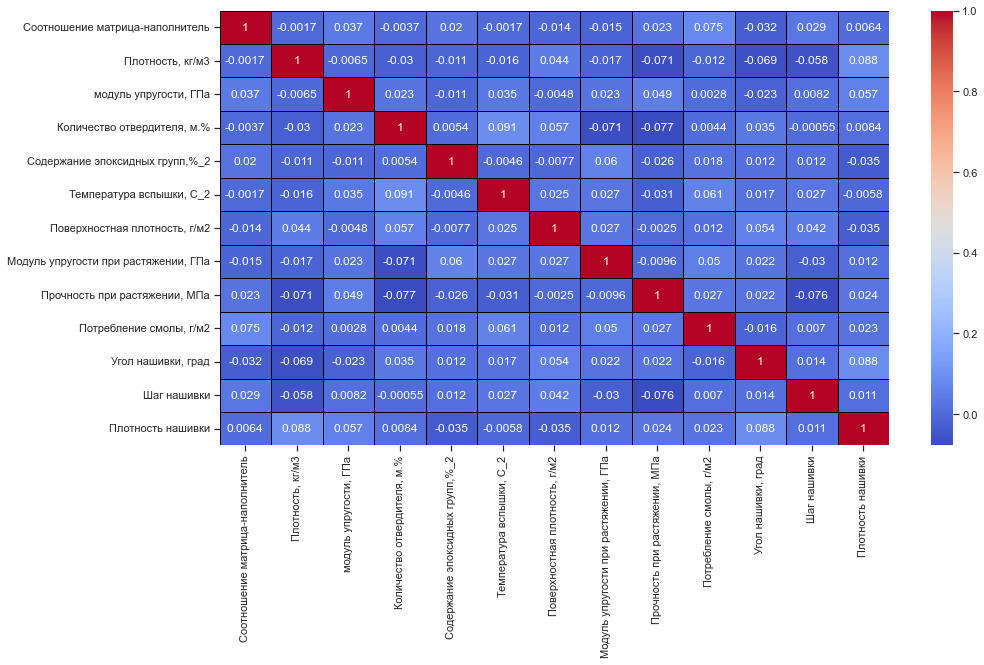

In [20]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_std_scaler.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

In [76]:
df_minmax_scaler_n = preprocessing.MinMaxScaler()

In [77]:
df_minmax_scaler_f = df_minmax_scaler_n.fit_transform(bp_nup_df2)

In [78]:
df_minmax_scaler = pd.DataFrame(df_minmax_scaler_f, columns = list(bp_nup_df2.columns))

In [72]:
df_minmax_scaler.head(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.282131          0.626533               0.385679   
1                         0.282131          0.626533               0.385679   
2                         0.282131          0.626533               0.385679   
3                         0.282131          0.626533               0.385679   
4                         0.457857          0.626533               0.393150   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.067654                         0.427467   
1                     0.178021                         0.506535   
2                     0.177469                         1.000000   
3                     0.613972                         0.373167   
4                     0.519387                         0.427467   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.000000                       0.149682   
1                  0.589311                       0.149682   
2                  0.589311                       0.149682   
3                  0.638420                       0.149682   
4                  0.589311                       0.149682   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.319194                       0.698235   
1                              0.319194                       0.698235   
2                              0.319194                       0.698235   
3                              0.319194                       0.698235   
4                              0.319194                       0.698235   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.488979                 0.0     0.214571           0.410468  
1                 0.488979                 0.0     0.214571           0.448106  
2                 0.488979                 0.0     0.214571           0.573568  
3                 0.488979                 0.0     0.289800           0.285006  
4                 0.488979                 0.0     0.289800           0.410468

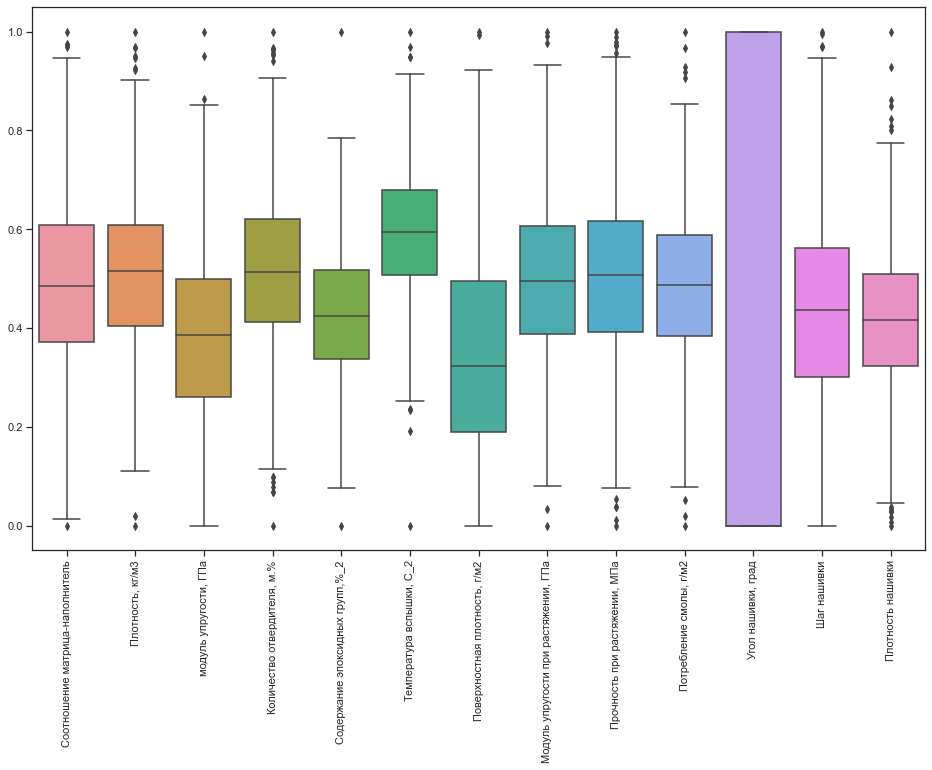

In [24]:
plt.figure(figsize=(16,10))
boxus = sns.boxplot(data=df_minmax_scaler)
boxus = boxus.set_xticklabels(boxus.get_xticklabels(),rotation=90)

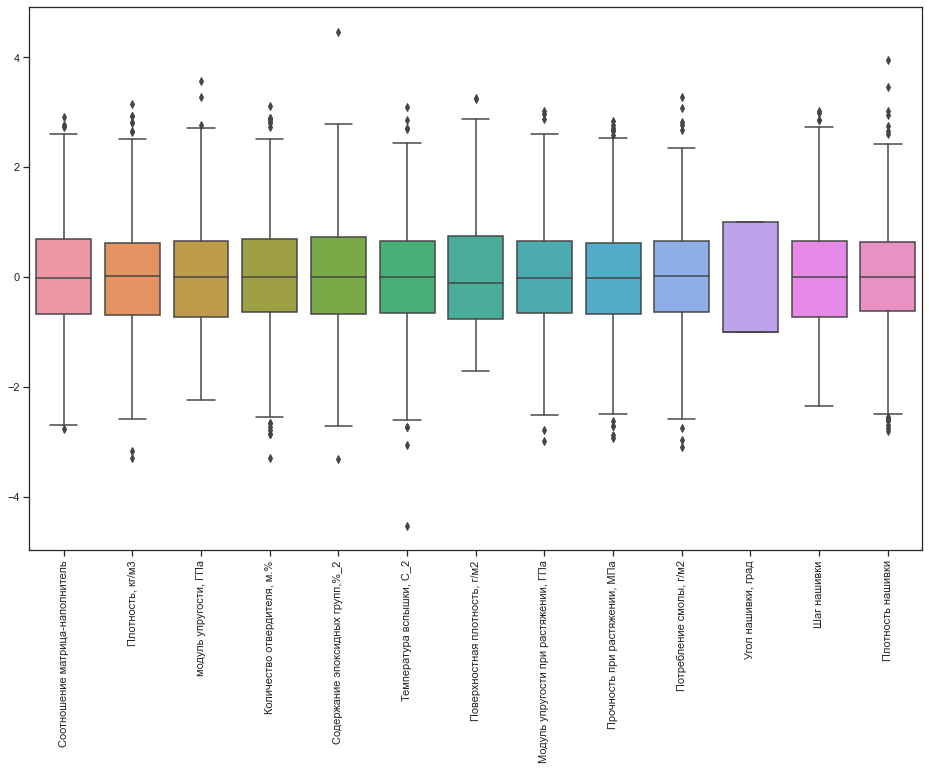

In [41]:
plt.figure(figsize=(16,10))
boxus2 = sns.boxplot(data=df_std_scaler)
boxus2 = boxus2.set_xticklabels(boxus2.get_xticklabels(),rotation=90)

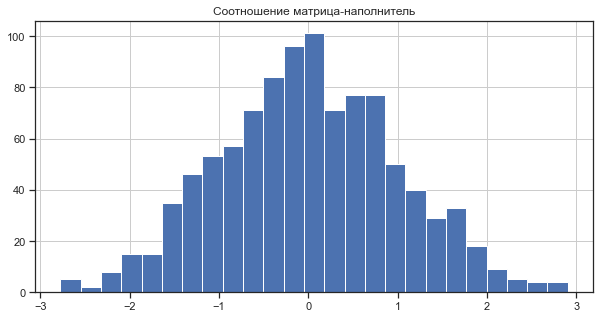

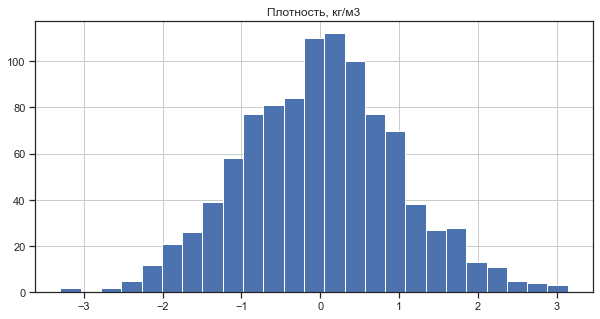

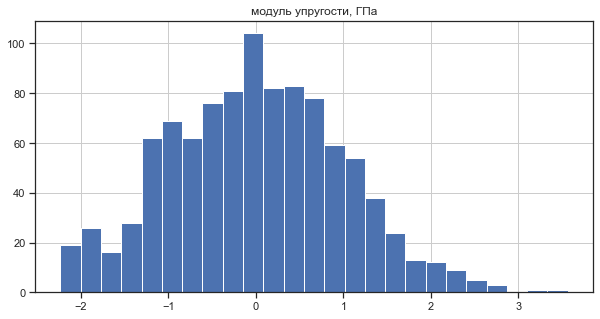

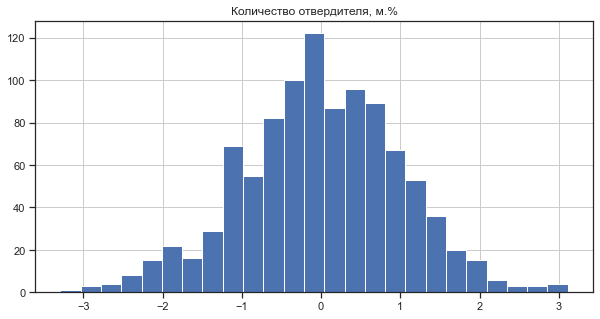

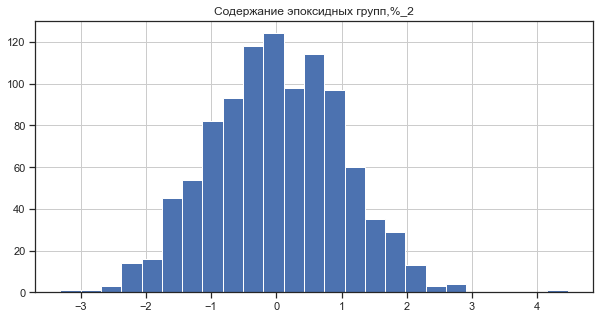

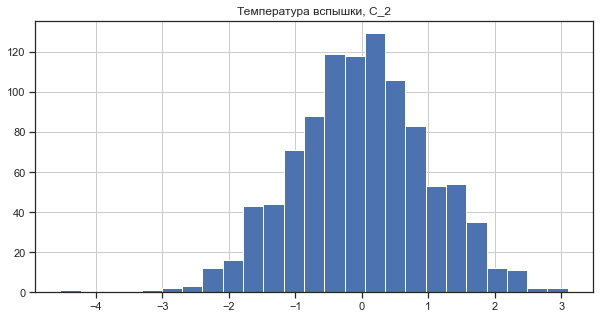

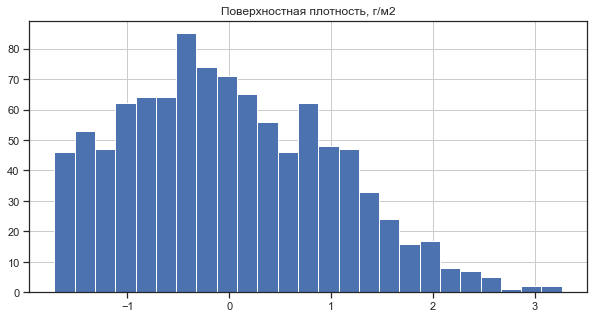

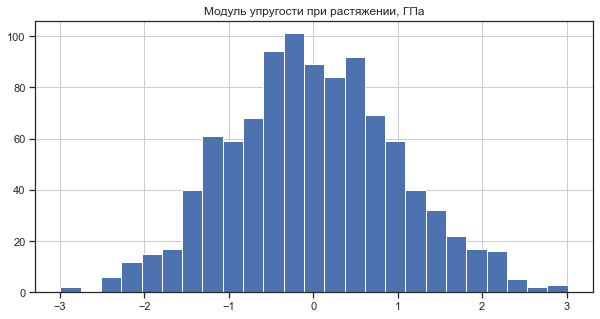

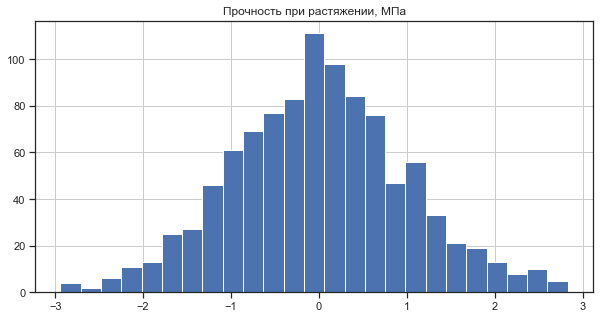

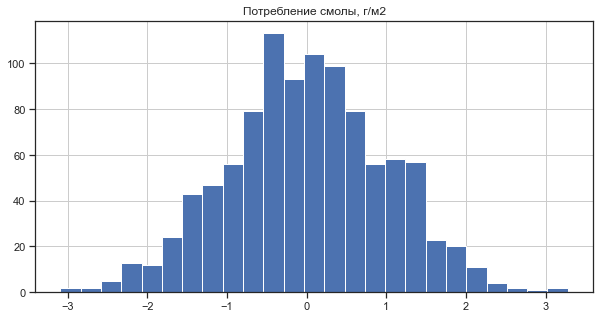

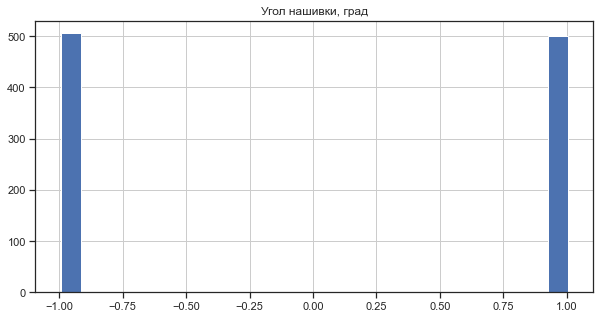

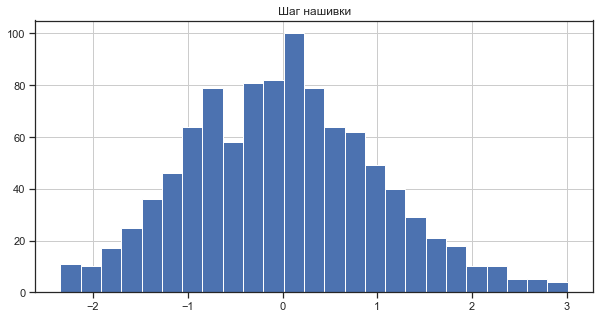

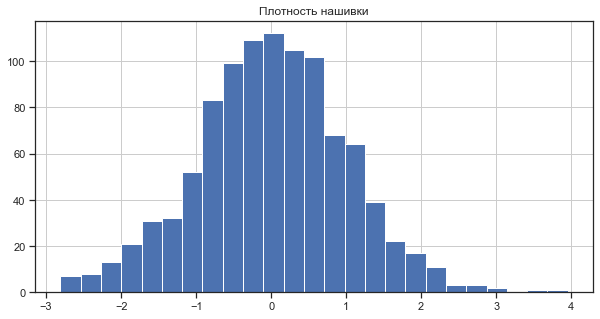

In [26]:
# Выводим распределение по всем столбцам
for column in df_std_scaler:
    plt.figure(column, figsize = (10, 5))
    plt.title(column)
    df_std_scaler[column].hist(bins=25)
    plt.show()

In [27]:
df_minmax_scaler_cl1 = df_minmax_scaler[df_minmax_scaler['Угол нашивки, град'] == 0]
df_minmax_scaler_cl2 = df_minmax_scaler[df_minmax_scaler['Угол нашивки, град'] == 1]

<AxesSubplot:>

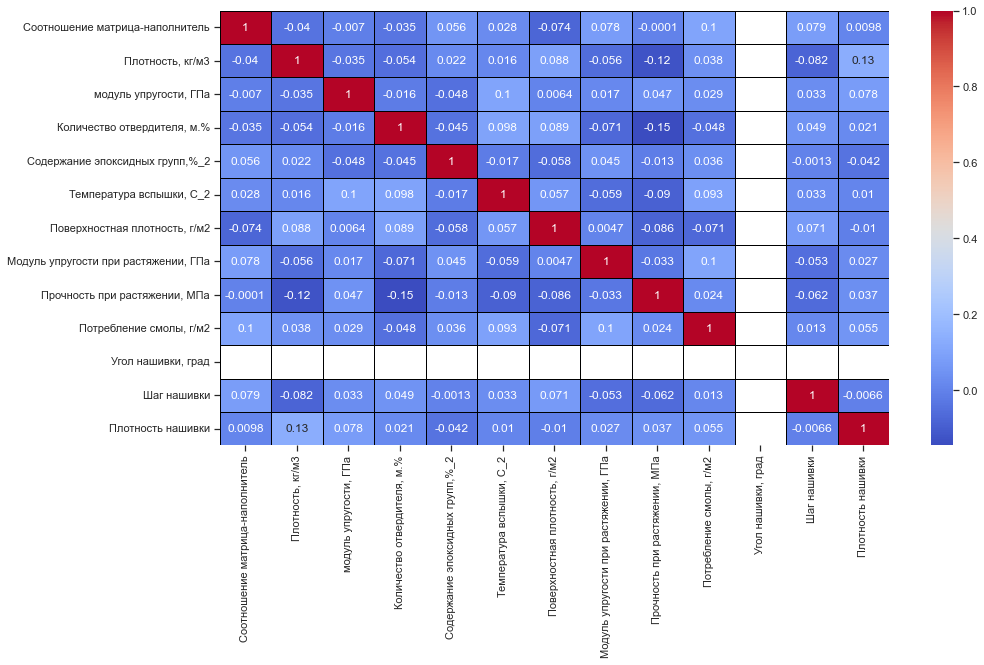

In [28]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_minmax_scaler_cl1.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

<AxesSubplot:>

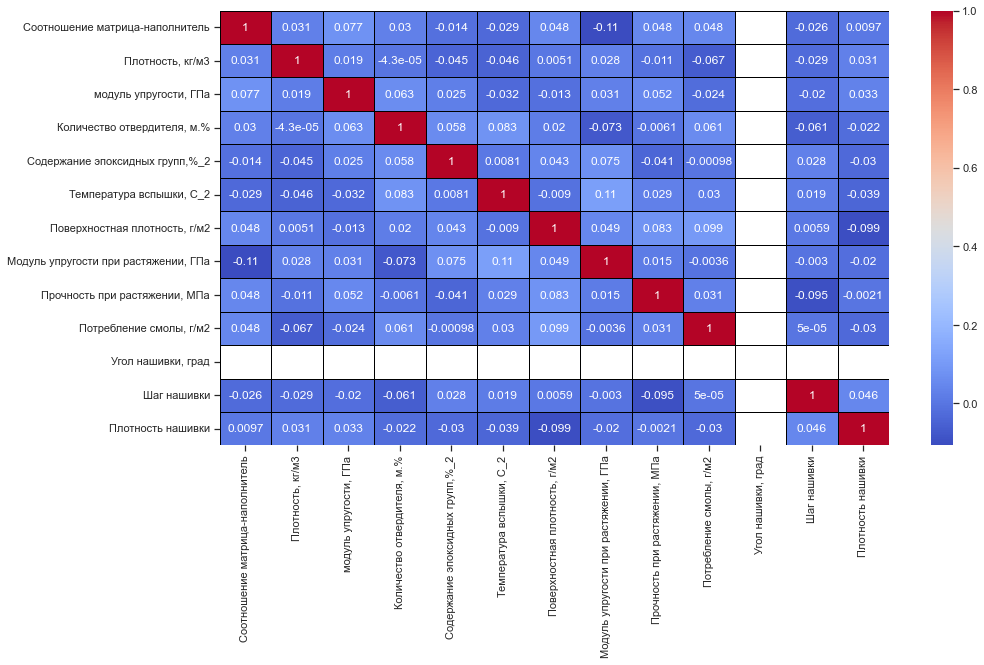

In [29]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_minmax_scaler_cl2.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

In [30]:
df_std_scaler_cl1 = df_std_scaler[df_std_scaler['Угол нашивки, град'] > 0]
df_std_scaler_cl2 = df_std_scaler[df_std_scaler['Угол нашивки, град'] < 0]

<AxesSubplot:>

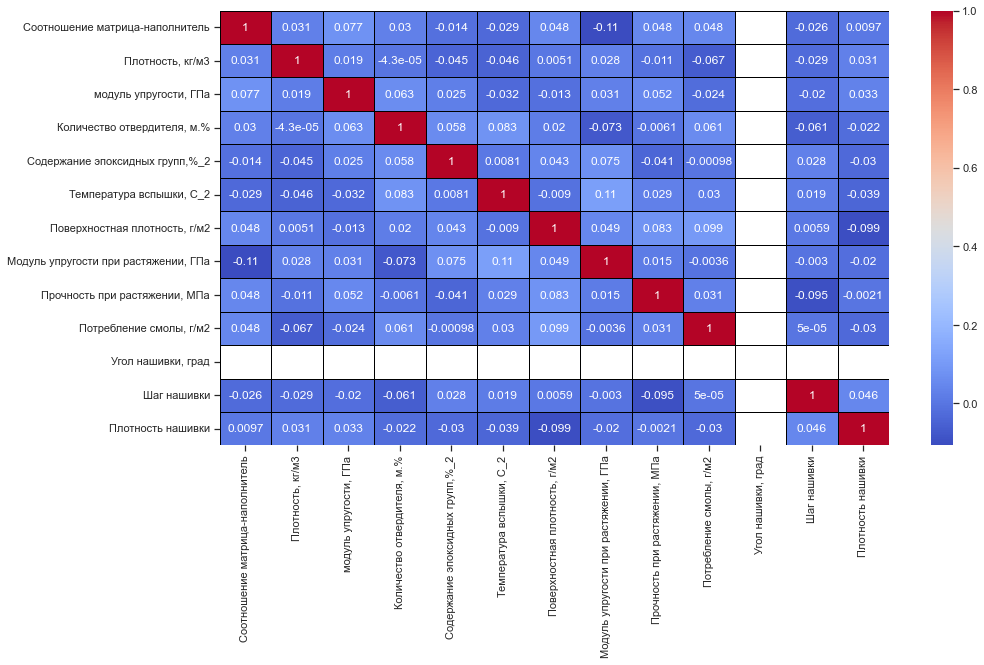

In [31]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_std_scaler_cl1.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

<AxesSubplot:>

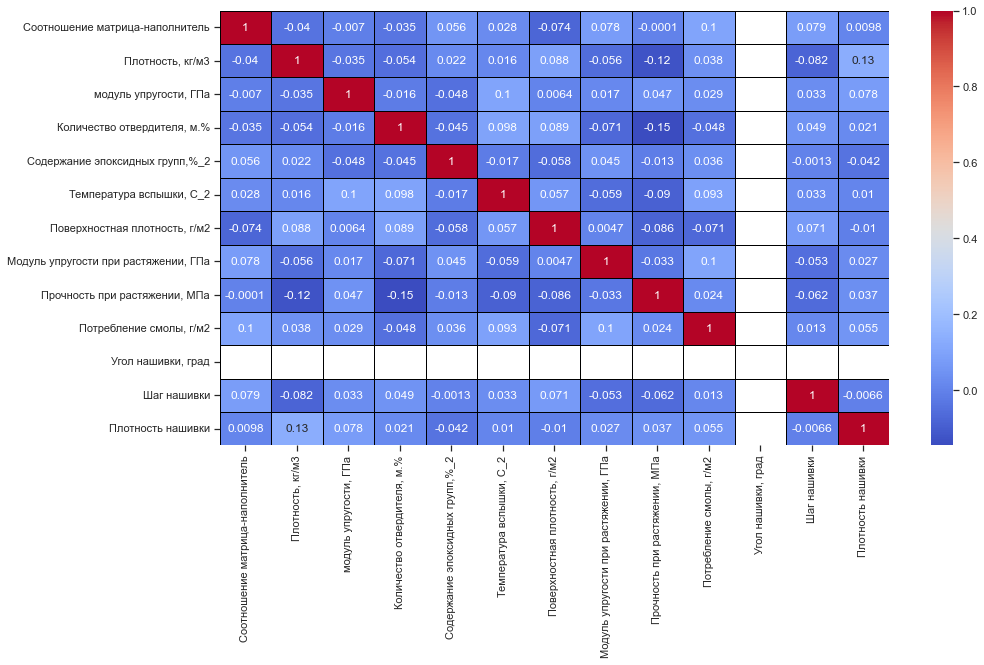

In [32]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_std_scaler_cl2.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

In [80]:
print(df_minmax_scaler_n.data_max_)

[   5.5917416  2207.77348061 1911.536477    198.95320719   33.
  413.27341824 1399.54236234   82.68205104 3848.43673188  414.59062836
   90.           14.44052188  103.9889013 ]
